# Jason Kabatoff

## Research question/interests

My research interest is to understand how productivity, measured in output per work hour, changes in correlation with certain variables. The variables selected vary by year for annual working hours per worker, GDP per capita, population, and days of vacation in a variety of countries. By investigating these variables, we can determine whether less or more work hours tend to correlate with countries that have higher GDP per capita, but also how those work hours are associated with higher productivities. 

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [10]:
df = pd.read_csv("../data/processed/cleaned_combined_data.csv")

In [55]:
print(df.shape)
print(df.nunique(axis=0)) #13 countries in the rangled data set
df.head()

(910, 8)
Entity                 13
Year                   70
Annual Working Hrs    906
GDP per capita        910
Population            910
Vacation Days          22
Productivity          910
Productivity?         910
dtype: int64


,Entity,Year,Annual Working Hrs,GDP per capita,Population,Vacation Days,Productivity,Productivity?
0,Canada,1950,2209.234041,12878.90219,13743068,22.0,13.109432,11.659156
1,Canada,1951,2194.183546,13025.04615,14085723,22.0,13.310612,11.872340
2,Canada,1952,2181.939348,13720.40223,14485746,22.0,14.433081,12.576337
3,Canada,1953,2180.528393,13979.35187,14901533,22.0,15.032083,12.821986
4,Canada,1954,2172.603665,13520.33396,15323199,22.0,15.145222,12.446204


In [12]:
print(df.columns)

Index(['Entity', 'Year', 'Annual working hours per worker',
       'GDP per capita (output, multiple price benchmarks)',
       'Population (historical estimates)',
       'Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007)',
       'Productivity: output per hour worked'],
      dtype='object')


In [13]:
#Probably a good idea to rename columns to something more workable.
df.rename(columns={'Annual working hours per worker': 'Annual Working Hrs', 'GDP per capita (output, multiple price benchmarks)': 'GDP per capita',
                  'Population (historical estimates)': 'Population', 'Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007)': 'Vacation Days',
                  'Productivity: output per hour worked': 'Productivity'}, inplace=True)

In [14]:
df.describe()

,Year,Annual Working Hrs,GDP per capita,Population,Vacation Days,Productivity
count,910.000000,910.000000,910.000000,9.100000e+02,910.000000,910.000000
mean,1984.500000,1813.722399,27206.721949,4.652565e+07,29.353846,35.445676
std,20.216308,230.991059,14497.845555,6.231216e+07,6.763819,19.346748
min,1950.000000,1380.607643,3857.871568,2.807012e+06,18.000000,4.209353
25%,1967.000000,1645.725923,15217.292065,9.556052e+06,24.000000,19.232580
50%,1984.500000,1802.997862,24526.883720,2.572300e+07,29.000000,33.576284
75%,2002.000000,1963.398584,37603.623035,5.683147e+07,35.000000,49.750285
max,2019.000000,2428.279448,102622.448900,3.343197e+08,44.000000,125.092536


In [80]:
#Seeing the correlation between the given productivity value, and one calculated by us.
df['Productivity?'] = 2*df['GDP per capita']/df['Annual Working Hrs'] 


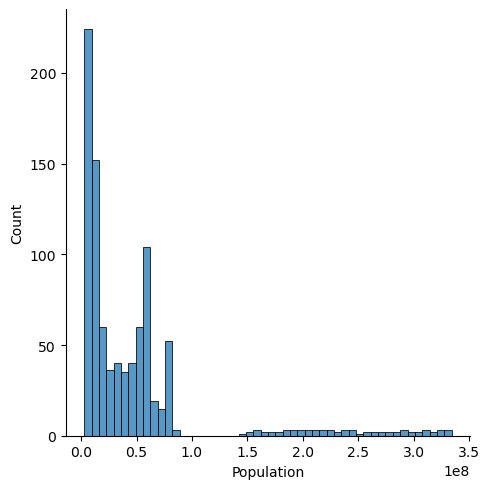

In [30]:
#Most of our data is looking at countries/years with populations of less than 100million, 
#while a few exceptions are in the >100 million population range
sns.displot(df['Population'], bins = 50)

In [58]:
df.loc[df['Population'] > 100000000].nunique(axis=0)
#Looks like there is 70 rows of data with populations of greater than 100 million all for a single unique country

Entity                 1
Year                  70
Annual Working Hrs    70
GDP per capita        70
Population            70
Vacation Days          4
Productivity          70
Productivity?         70
dtype: int64

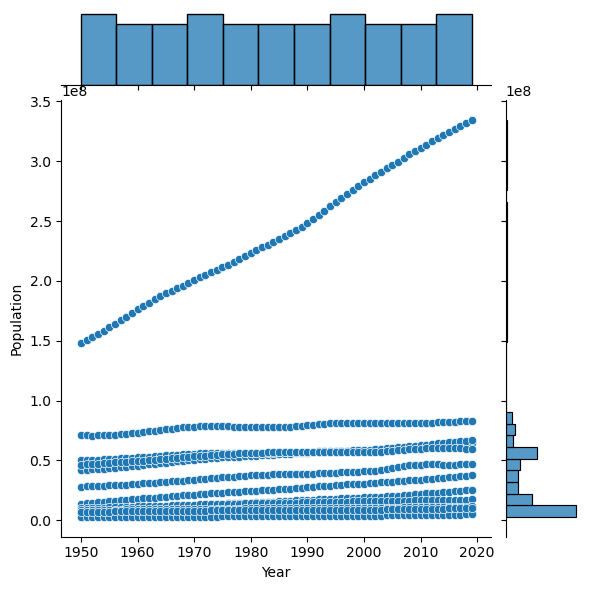

In [102]:
sns.jointplot(x='Year', y='Population', data = df)
#Again, one single country, the US, dominating in terms of population for our data.

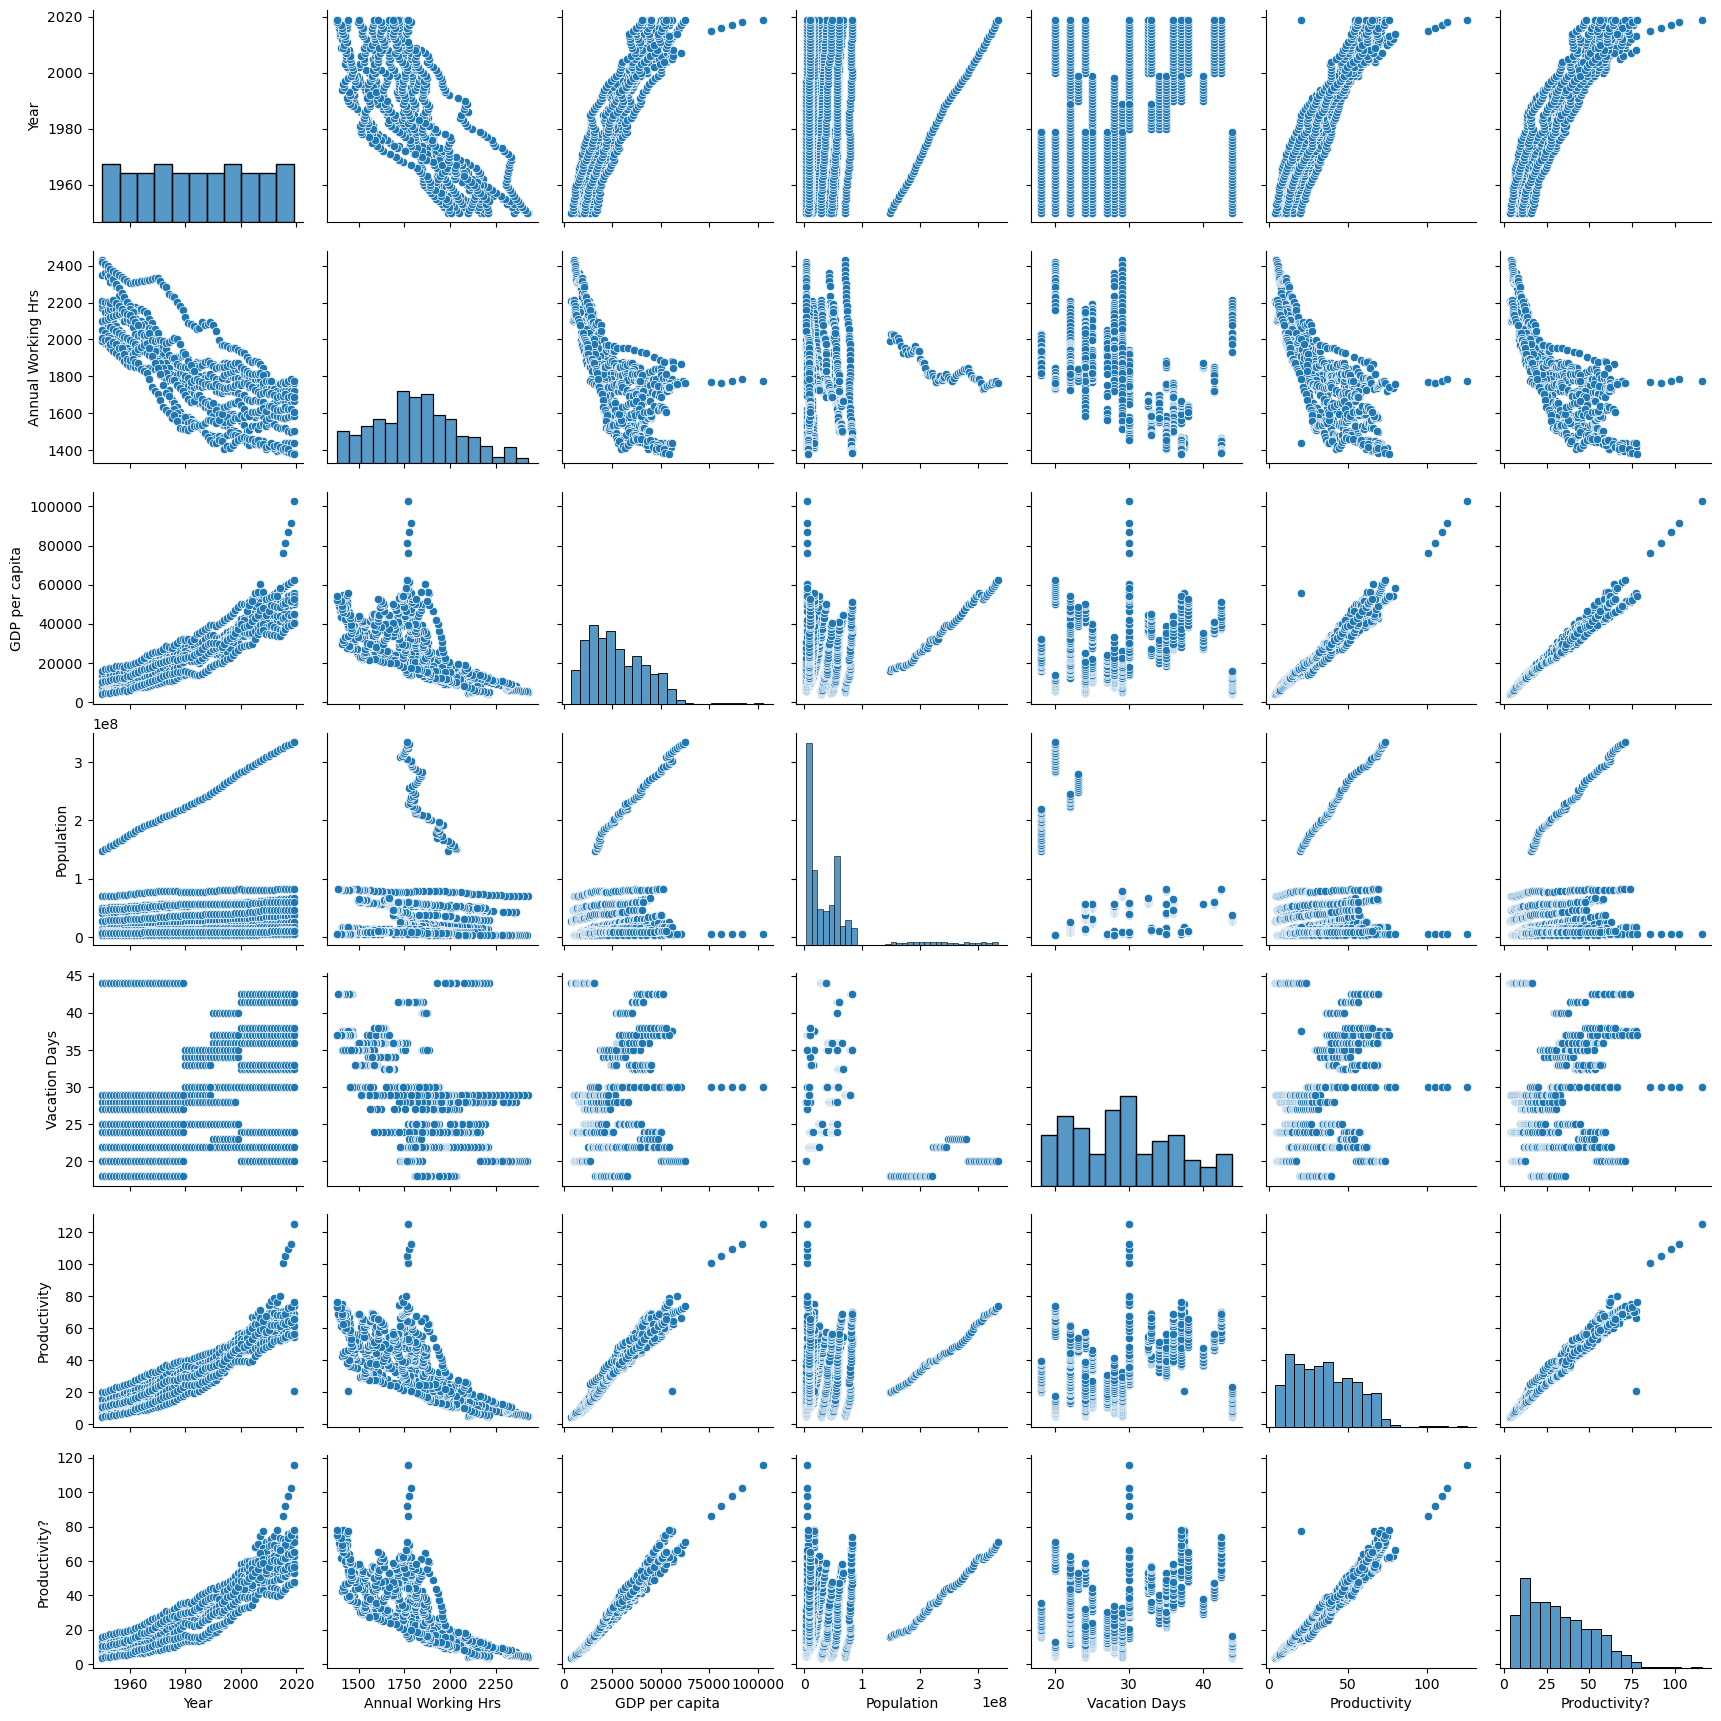

In [78]:
sns.pairplot(df)
df_s = df.copy()   
df_s.drop(df_s[df_s['Entity'] == 'United States'].index, inplace = True)
#Since the US data is having an impact on data visualization due to being an outlier, it might be a good idea to remove it for this.

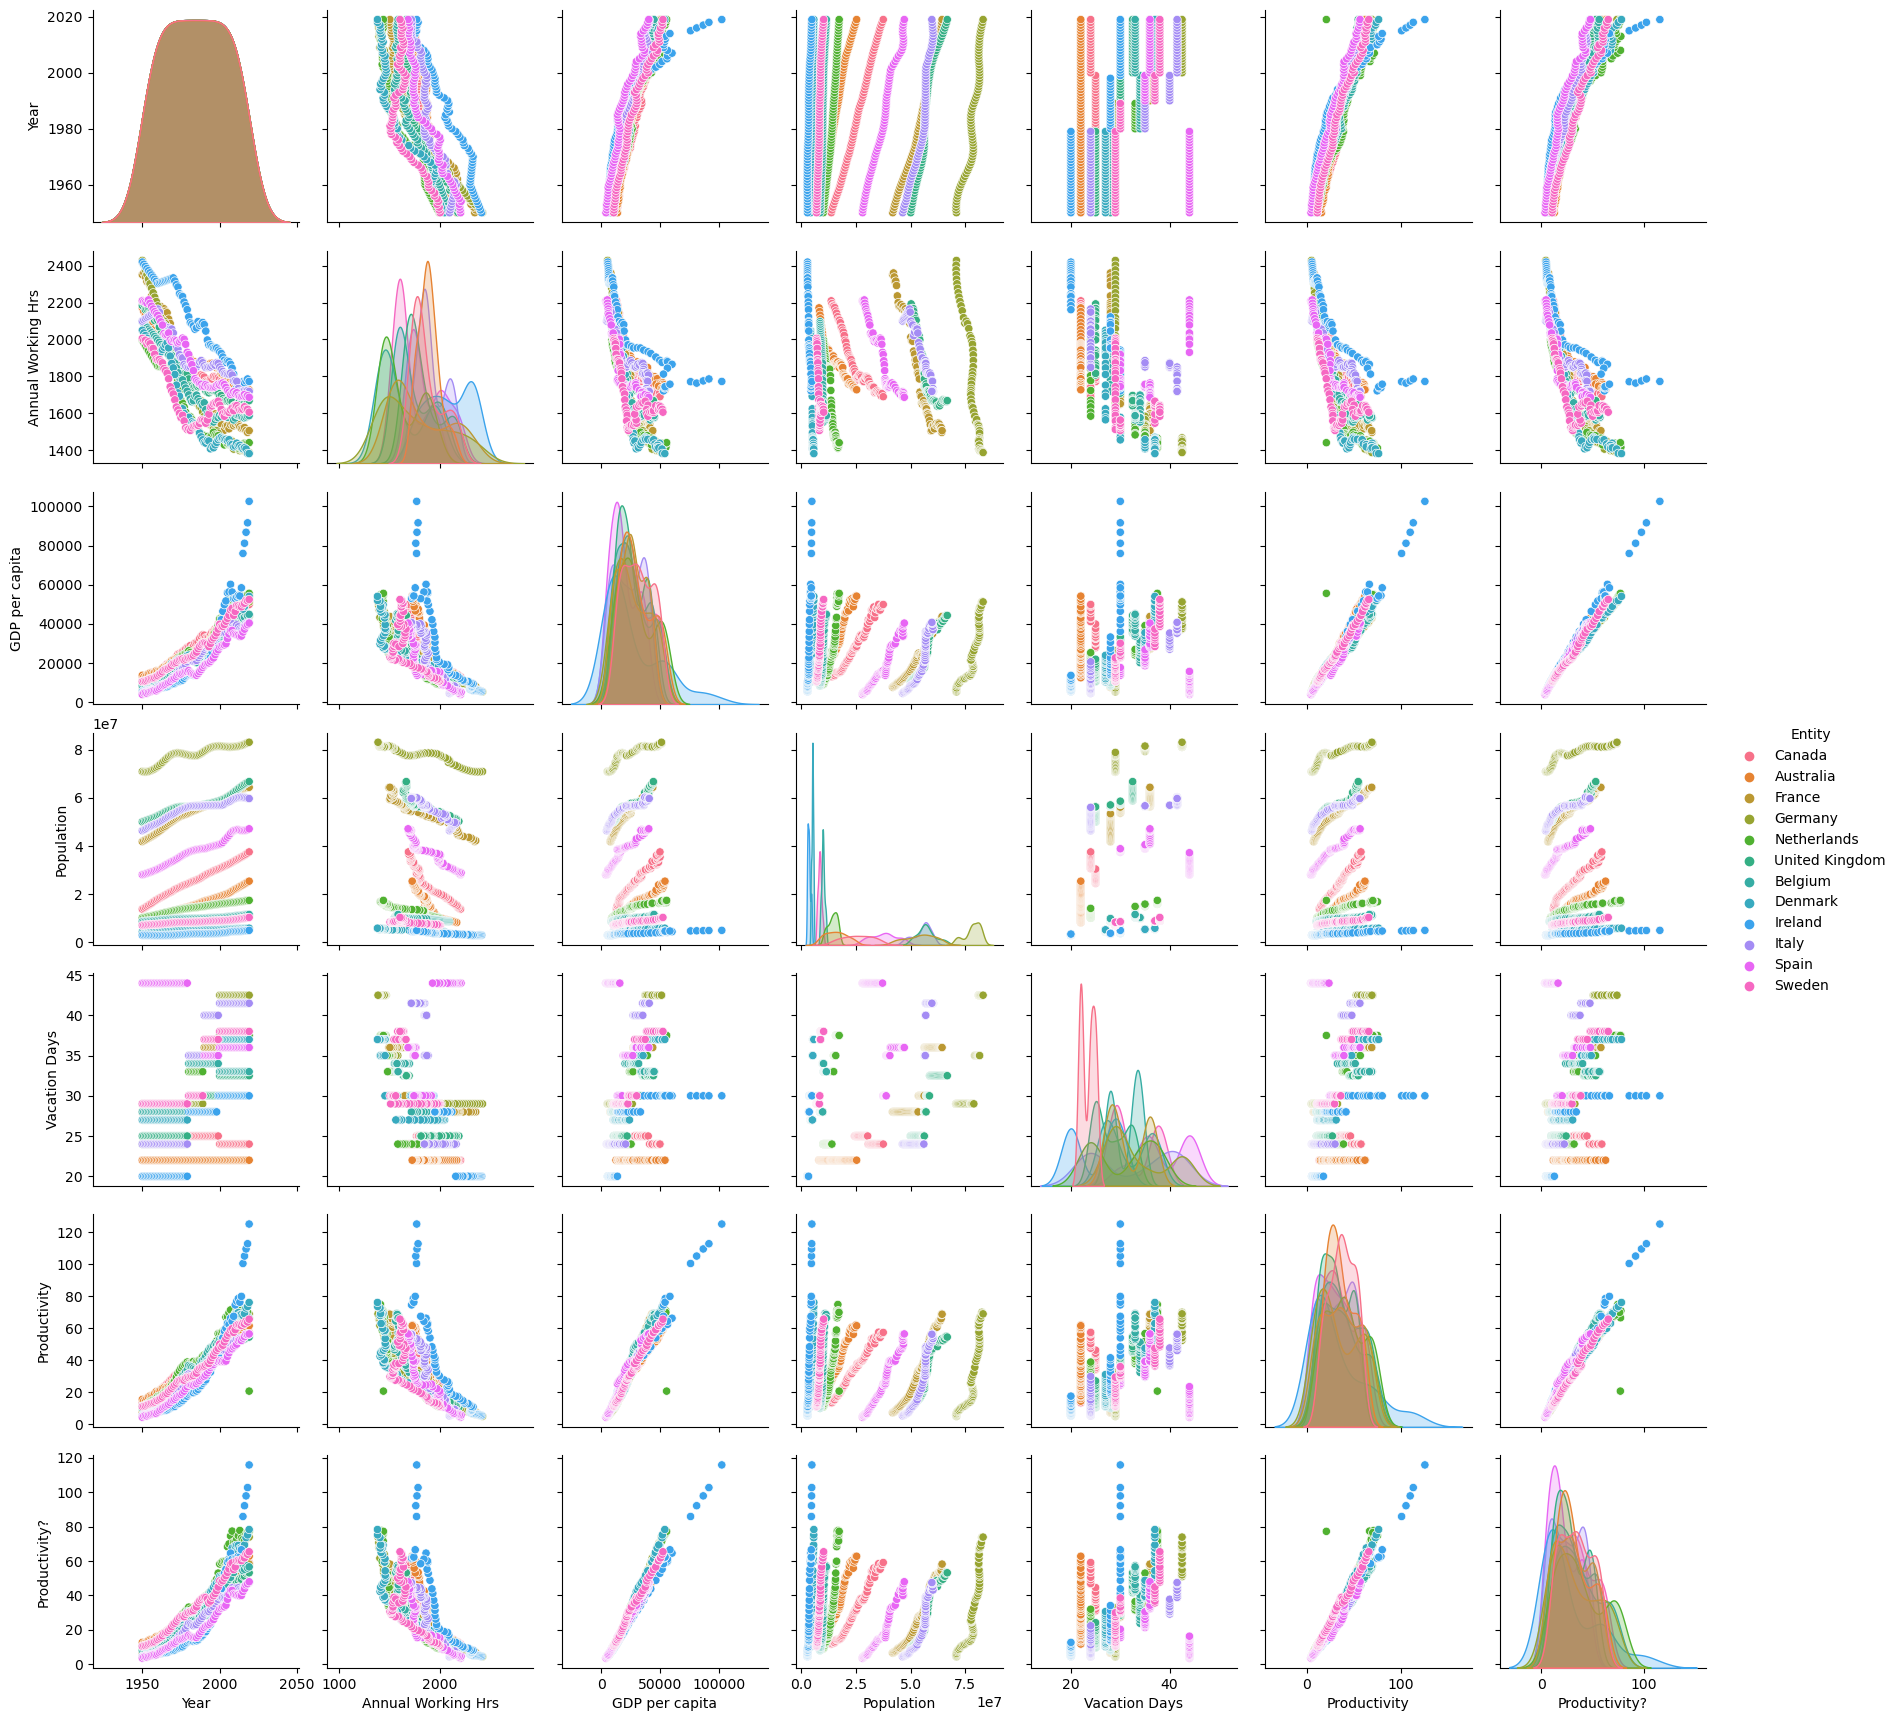

In [100]:
sns.pairplot(df_s, hue='Entity')
#From this some trends seem to emerge: as population increases, 
#average working hours decrease or alternatively, as year increases, average working hours decrease).

<AxesSubplot:>

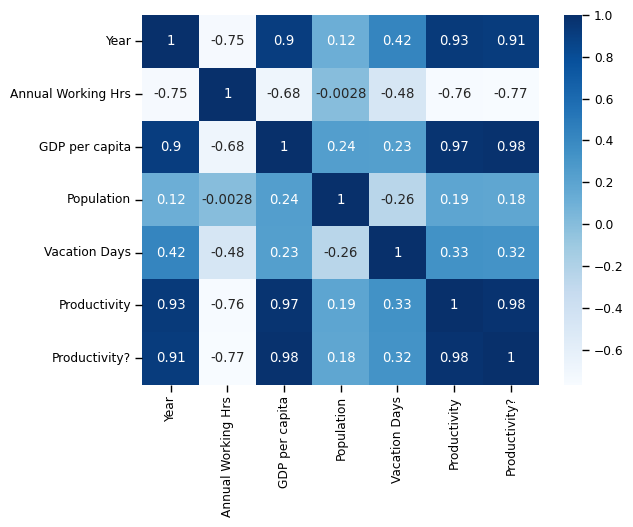

In [128]:
df_mx = df.corr()
df_mx
sns.heatmap(df_mx, annot = True, cmap = 'Blues')
#Interestingly annual working hours is negatively correlated with productivity.

In [120]:
df_mx

,Year,Annual Working Hrs,GDP per capita,Population,Vacation Days,Productivity,Productivity?
Year,1.000000,-0.746152,0.903887,0.116139,0.422612,0.927213,0.912696
Annual Working Hrs,-0.746152,1.000000,-0.680881,-0.002834,-0.475802,-0.755709,-0.767510
GDP per capita,0.903887,-0.680881,1.000000,0.240650,0.234176,0.970552,0.983173
Population,0.116139,-0.002834,0.240650,1.000000,-0.255904,0.187955,0.184675
Vacation Days,0.422612,-0.475802,0.234176,-0.255904,1.000000,0.332943,0.324973
Productivity,0.927213,-0.755709,0.970552,0.187955,0.332943,1.000000,0.975840
Productivity?,0.912696,-0.767510,0.983173,0.184675,0.324973,0.975840,1.000000


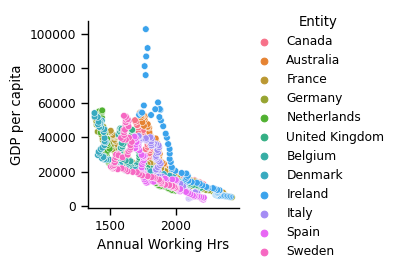

In [127]:
sns.pairplot(df_s, hue='Entity', x_vars = 'Annual Working Hrs', y_vars = 'GDP per capita')

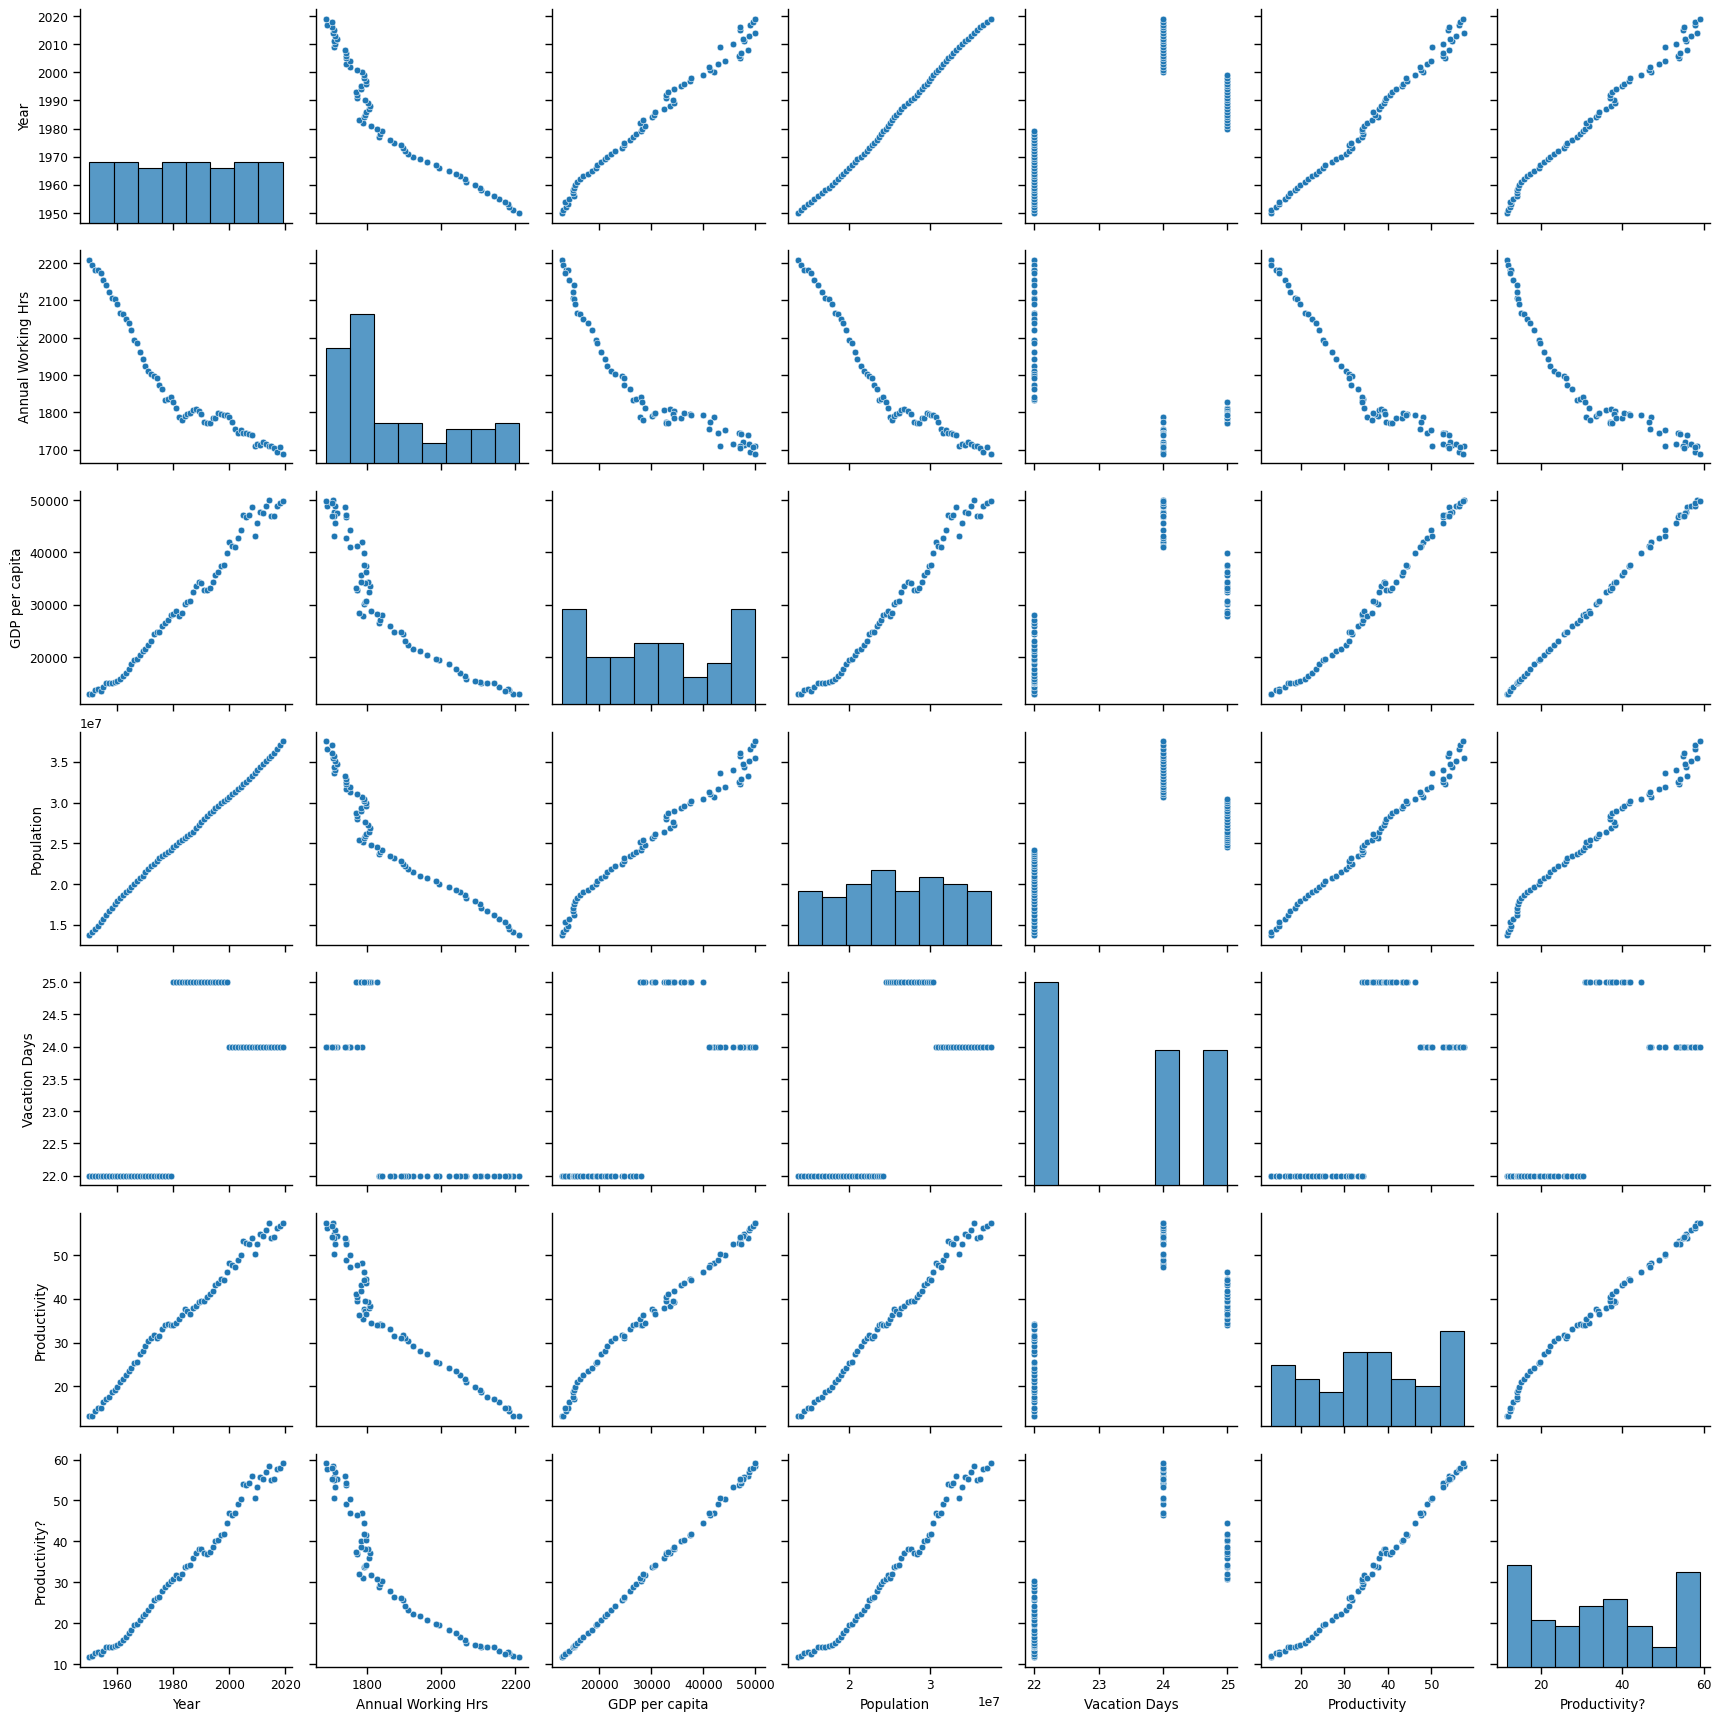

In [131]:
sns.pairplot(df_can)

<AxesSubplot:xlabel='Vacation Days', ylabel='Productivity'>

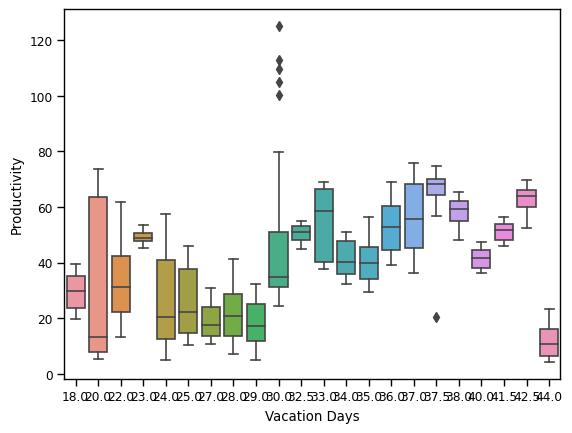

In [147]:
sns.boxplot(x='Vacation Days', y='Productivity', data = df)
#appears that between 30 and 42 vacation days per year is correlated with higher productivity.

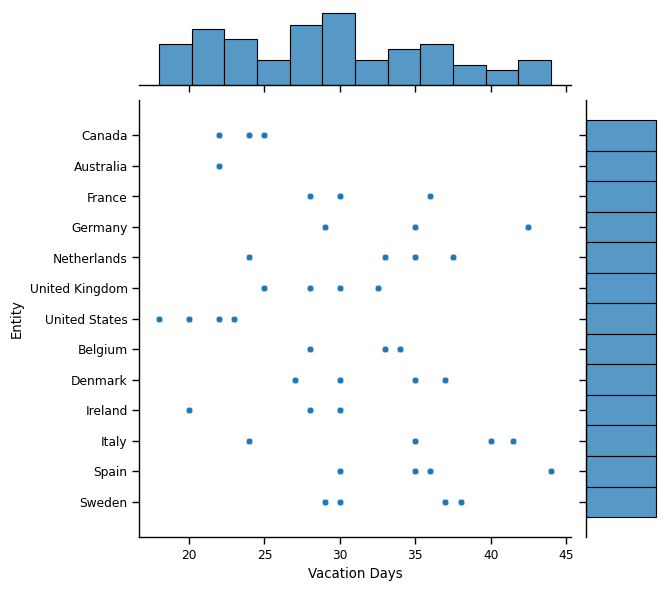

In [151]:
df_vac = [df['Vacation Days'] > 35]
sns.jointplot(x = 'Vacation Days', y = 'Entity', data = df)